In [40]:
import numpy as np  
import matplotlib.pyplot as plt 
import time
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import seaborn as sns

Perceptron method:

In [2]:
# Define h_w(x):= W^T.x + w_0 = Wbar^T . xbar
def h(w, x):     
    return np.sign(np.dot(w.T, x))

#Stop condition 
def has_converged(X, y, w): 
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init, eta=1, fit_intercept=False, max_iter=10000):
    X_ = X.copy() 
    if fit_intercept:
        X_ = np.concatenate((np.ones((1, X.shape[1])), X), axis=0)

    w = [w_init] 
    N = X_.shape[1]
    d = X_.shape[0] 
    mis_points = [] # set of miss position points

    for i in range(max_iter): 
        # mix data  
        mix_id = np.random.permutation(N) 
        for j in range(N): 
            xj = X_[:, mix_id[j]].reshape(d, 1) 
            yj = y[0, mix_id[j]] 
            if h(w[-1], xj)[0] != yj: 
                mis_points.append(mix_id[j]) 
                w_new = w[-1] + eta * yj*xj  
                w.append(w_new) 
                 
        if has_converged(X_, y, w[-1]):
            print(f'Converged after {i+1} iterations.')
            break

    else:
        print('Failed to converge.')
    return (w, mis_points)

## Ví dụ 1.

In [3]:
np.random.seed(2) 
 
means = [[2, 2], [4, 2]] 
cov = [[.3, .2], [.2, .3]] 
N = 30 
X0 = np.random.multivariate_normal(means[0], cov, N).T 
X1 = np.random.multivariate_normal(means[1], cov, N).T 
 
X = np.concatenate((X0, X1), axis = 1) 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) 
# Xbar  
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

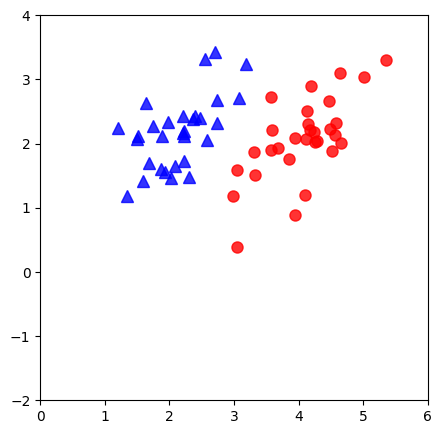

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))   
 
ani = plt.cla() 
#plot points 
ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8) 
ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8) 
ani = plt.axis([0 , 6, -2, 4]) 
plt.show()

In [5]:
# random init
d = X.shape[0]
eta = 0.05 
np.random.seed(0)
w_init_random = np.random.randn(d, 1) 
(w_random, m_random) = perceptron(X, y, w_init_random, eta=0.05) 
print(w_random[-1])

Converged after 2 iterations.
[[ 1.51405235]
 [-0.79410192]
 [ 0.43378242]]


In [6]:
# zeros init
d = X.shape[0] 
w_init_zeros = np.ones((d, 1)) 
(w_zeros, m_zeros) = perceptron(X, y, w_init_zeros) 
print(w_zeros[-1])

Converged after 1 iterations.
[[ 0.65      ]
 [-0.42882737]
 [ 0.26895666]]


In [7]:
# ones init
d = X.shape[0] 
w_init_ones = np.ones((d, 1)) 
(w_ones, m_ones) = perceptron(X, y, w_init_ones) 
print(w_ones[-1])

Converged after 1 iterations.
[[ 0.65      ]
 [-0.51168452]
 [ 0.3733538 ]]


In [8]:
def draw_line(w): 
    w0, w1, w2 = w[0], w[1], w[2] 
    if w2 != 0: 
        x11, x12 = -100, 100 
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k') 
    else: 
        x10 = -w0/w1 
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


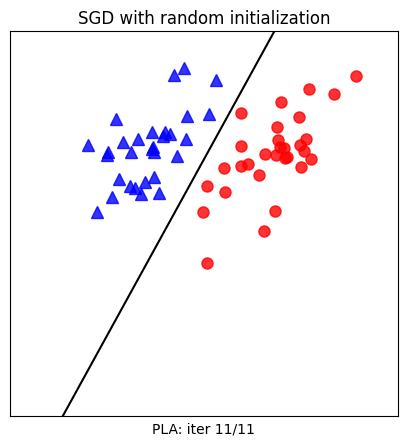

MovieWriter imagemagick unavailable; using Pillow instead.


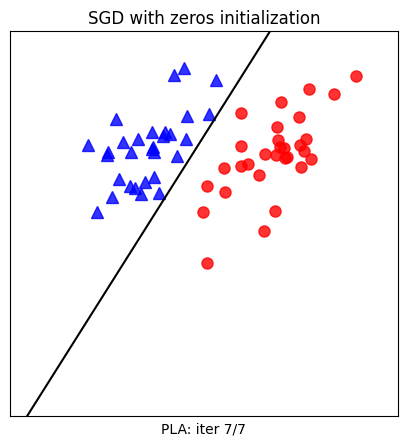

MovieWriter imagemagick unavailable; using Pillow instead.


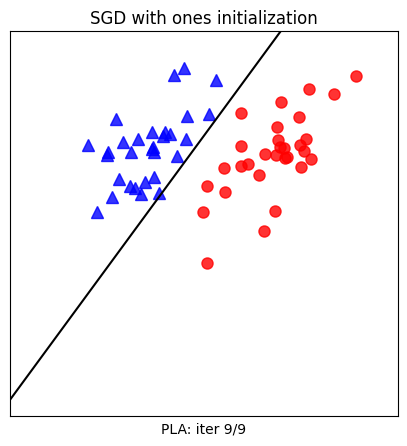

In [11]:
## Visualization 
import matplotlib.animation as animation 
from matplotlib.animation import FuncAnimation  
 
def viz_alg_1d_2(w, m, save_path, init): 
    it = len(w)     
    fig, ax = plt.subplots(figsize=(5, 5))   
     
    def update(i): 
        ani = plt.cla() 
        #points 
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8) 
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8) 
        ani = plt.axis([0 , 6, -2, 4]) 
        i2 =  i if i < it else it-1 
        ani = draw_line(w[i2]) 
        if i < it-1: 
            # draw one  misclassified point 
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = 
False) 
            ax.add_artist(circle) 
        # hide axis
        cur_axes = plt.gca() 
        cur_axes.axes.get_xaxis().set_ticks([]) 
        cur_axes.axes.get_yaxis().set_ticks([]) 
 
        label = 'PLA: iter %d/%d' %(i2, it-1) 
        ax.set_xlabel(label)
        ax.set_title(f'SGD with {init} initialization') 
        return ani, ax  
         
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000) 
    # save  
    anim.save(save_path, dpi = 100, writer = 'imagemagick') 
    plt.show() 
     
viz_alg_1d_2(w_random, m_random, 'pla_vis_random.gif', init='random')
viz_alg_1d_2(w_zeros, m_zeros, 'pla_vis_zeros.gif', init='zeros')
viz_alg_1d_2(w_ones, m_ones, 'pla_vis_ones.gif', init='ones')

## Ví dụ 2.

#### a.

In [13]:
main_df = pd.read_csv('sonar.all-data.csv',header=None) 
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


<Axes: ylabel='60'>

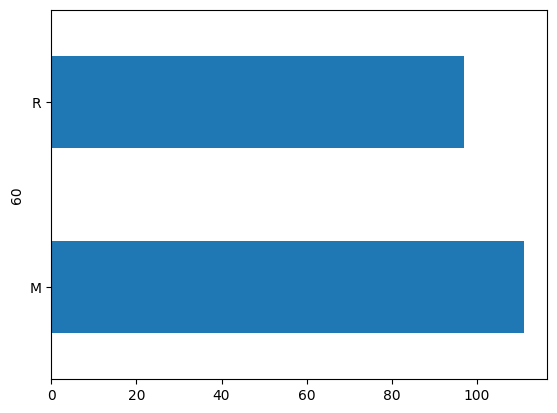

In [14]:
main_df[60].value_counts().plot(kind='barh')

In [15]:
y_df = main_df[60] 
targes_label = {'M': 1,'R': -1} 
targes_df = [targes_label[item] for item in y_df] 
print(targes_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
inputs_df = main_df.drop(60, axis=1)

In [17]:
inputs_df = main_df.drop(60, axis=1) 
x0 = np.ones(( inputs_df.shape[0], 1)) 
X = np.concatenate((x0, inputs_df), axis = 1)

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30, 
random_state=42)

#### b.

In [23]:
d = X_train.T.shape[0] 
np.random.seed(0)
w_init = np.random.randn(d, 1)
start_time = time.time() 
(w, m) = perceptron(X_train.T, np.expand_dims(y_train, axis=0), w_init) 
end_time = time.time()
print(w[-1])

Converged after 145 iterations.
[[ -41.23594765]
 [ 152.55365721]
 [ -49.26116202]
 [-153.2765068 ]
 [ 154.45635799]
 [  39.57402212]
 [  32.96798842]
 [ -68.14775721]
 [ -27.42281885]
 [  51.8498985 ]
 [ -55.99625643]
 [  87.99197351]
 [  13.23413773]
 [  -5.47352498]
 [ -10.49193677]
 [  10.54677433]
 [ -27.30702093]
 [ -33.48725826]
 [  43.5029677 ]
 [ -18.31549574]
 [  53.85451018]
 [ -77.1455814 ]
 [  75.6748362 ]
 [ -55.72826502]
 [  68.60295462]
 [  -9.01796567]
 [ -12.21644148]
 [  -1.60078385]
 [  16.35867921]
 [ -28.73144123]
 [  74.91684743]
 [-105.50823748]
 [  32.12871425]
 [  43.02840353]
 [ -52.08421215]
 [  37.51184897]
 [ -69.77510932]
 [  17.51157985]
 [  -8.93992682]
 [  54.18589725]
 [ -52.52645297]
 [ -12.13071794]
 [ -27.02517019]
 [  63.1133754 ]
 [  -1.43335218]
 [  -6.6094743 ]
 [  55.39120464]
 [ -44.99490964]
 [ 141.80220215]
 [ 153.39135972]
 [-209.63426656]
 [ 100.4263025 ]
 [  69.06249486]
 [  22.85106782]
 [ 122.19551777]
 [  -5.44516813]
 [ -66.20778278]

Text(0.5, 1.0, 'Accuracy: 0.7778, time=3.6259s')

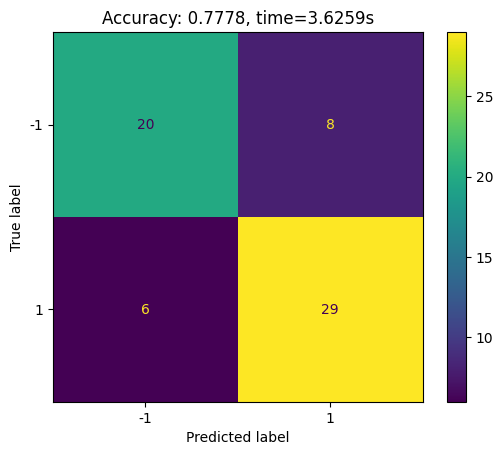

In [32]:
# predict
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = h(w[-1], X_test.T).squeeze()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}, time={end_time-start_time:.4f}s')

#### c.

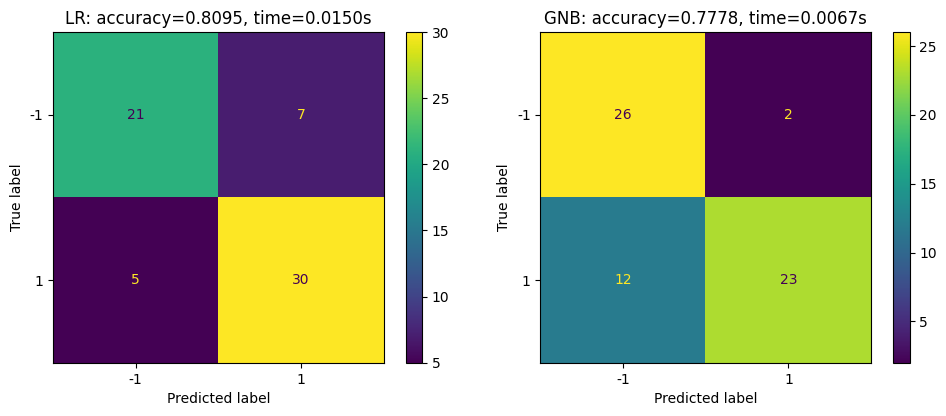

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import time

lr = LogisticRegression(fit_intercept=True, max_iter=10000)
gnb = GaussianNB(priors=None)

lr_time_start = time.time()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_time_end = time.time()

gnb_time_start = time.time()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_time_end = time.time()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=axes[0])
axes[0].set_title(f'LR: accuracy={accuracy_score(y_test, lr_pred):.4f}, time={lr_time_end-lr_time_start:.4f}s')

ConfusionMatrixDisplay.from_predictions(y_test, gnb_pred, ax=axes[1])
axes[1].set_title(f'GNB: accuracy={accuracy_score(y_test, gnb_pred):.4f}, time={gnb_time_end-gnb_time_start:.4f}s')

plt.tight_layout()
plt.show()

## Ví dụ 3

In [105]:
from sklearn import datasets  
from sklearn.model_selection import train_test_split 
  
cancer_data = datasets.load_breast_cancer() 
  
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,  
     cancer_data.target,  
     test_size=0.3,random_state=109)
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

Perceptron:

In [106]:
d = X_train.shape[1]
w_init = np.ones((d, 1))
y_train = np.array(list(map(lambda x: -1 if x == 0 else 1, y_train)))
y_test = np.array(list(map(lambda x: -1 if x == 0 else 1, y_test)))
w, m = perceptron(X_train.T, np.expand_dims(y_train, axis=0), w_init)
print(w[-1])

Failed to converge.
[[ 12641.        ]
 [ 86224.27599993]
 [ 38514.94999996]
 [133821.22000004]
 [ -4849.5       ]
 [ -2327.7514    ]
 [-11713.26814001]
 [-16991.2472332 ]
 [ -7215.0603    ]
 [ -3439.2951    ]
 [  -636.57534   ]
 [  3922.5775    ]
 [ 27350.18719999]
 [ -3615.53380001]
 [-20103.856     ]
 [  -274.219679  ]
 [ -2909.198789  ]
 [ -4272.5937502 ]
 [ -1065.37079   ]
 [  -744.197658  ]
 [  -291.763882  ]
 [ 98097.42600011]
 [-81407.10999997]
 [-66584.72000006]
 [ -3266.5       ]
 [ -4541.98502   ]
 [-38440.12515002]
 [-49944.626392  ]
 [-14519.06824998]
 [-10960.4765    ]
 [ -3584.40793   ]]


Text(0.5, 1.0, 'Accuracy: 0.9474, time=3.6259s')

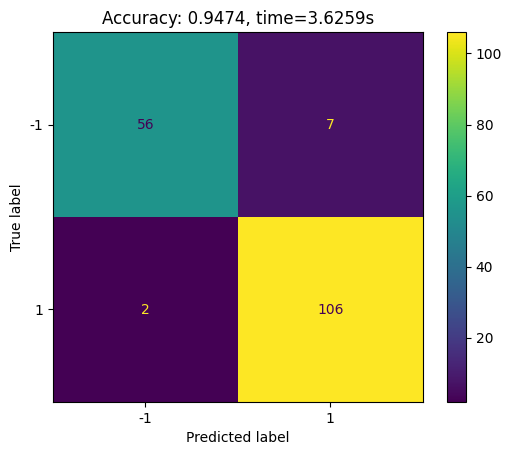

In [ ]:
# predict
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = h(w[-1], X_test.T).squeeze()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}, time={end_time-start_time:.4f}s')

Logistic regression and Gaussian NB:

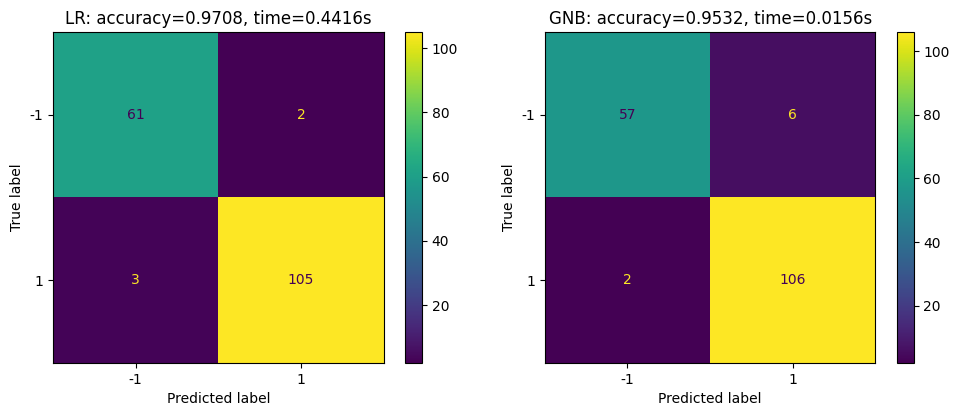

In [108]:
lr = LogisticRegression(fit_intercept=False,max_iter=10000)
gnb = GaussianNB(priors=None)

lr_time_start = time.time()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_time_end = time.time()

gnb_time_start = time.time()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_time_end = time.time()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=axes[0])
axes[0].set_title(f'LR: accuracy={accuracy_score(y_test, lr_pred):.4f}, time={lr_time_end-lr_time_start:.4f}s')

ConfusionMatrixDisplay.from_predictions(y_test, gnb_pred, ax=axes[1])
axes[1].set_title(f'GNB: accuracy={accuracy_score(y_test, gnb_pred):.4f}, time={gnb_time_end-gnb_time_start:.4f}s')

plt.tight_layout()
plt.show()

## Ví dụ 4

In [6]:
data = pd.read_csv('framingham.csv')
data.dropna(how='any', axis=0, inplace=True)
X, y = data.drop('TenYearCHD', axis=1), data['TenYearCHD']

#### 1.

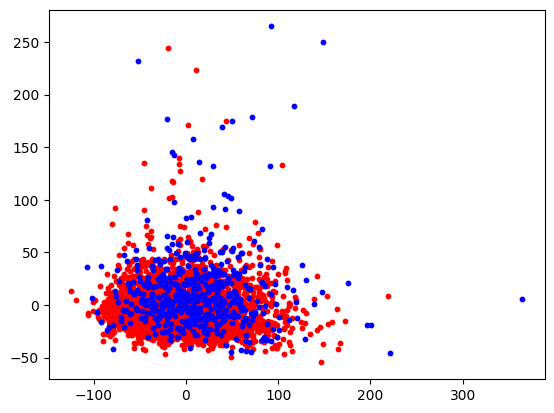

In [7]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(X)

# visualize
transformed0 = transformed[y == 0]
transformed1 = transformed[y == 1]

plt.scatter(transformed0[:, 0], transformed0[:, 1], c='r', s=10, label='Negative')
plt.scatter(transformed1[:, 0], transformed1[:, 1], c='b', s=10, label='Positive')

#### 2.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)

a.

In [11]:
X_train_ = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test_ = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_train_ = np.array(list(map(lambda x: -1 if x == 0 else 1, y_train)))
y_test_ = np.array(list(map(lambda x: -1 if x == 0 else 1, y_test)))
w_init = np.zeros((X_train_.T.shape[0], 1))
w, m = perceptron(X_train_.T, np.expand_dims(y_train_, axis=0), w_init)
print(w[-1])

Failed to converge.
[[-81518.  ]
 [ 13199.  ]
 [  1381.  ]
 [ -5810.  ]
 [ -3309.  ]
 [   599.  ]
 [  2130.  ]
 [ 12132.  ]
 [ 20188.  ]
 [ 15449.  ]
 [   165.  ]
 [   279.5 ]
 [  -671.5 ]
 [  -794.34]
 [  -539.  ]
 [   265.  ]]


In [214]:
# default perceptron
pct = Perceptron(random_state=None, max_iter=10000)
pct.fit(X_train, y_train)

sklearn_pred = pct.predict(X_test)

# balanced class weight
pct_balanced = Perceptron(random_state=None, max_iter=10000, class_weight='balanced')
pct_balanced.fit(X_train, y_train)

sklearn_balanced_pred = pct_balanced.predict(X_test)

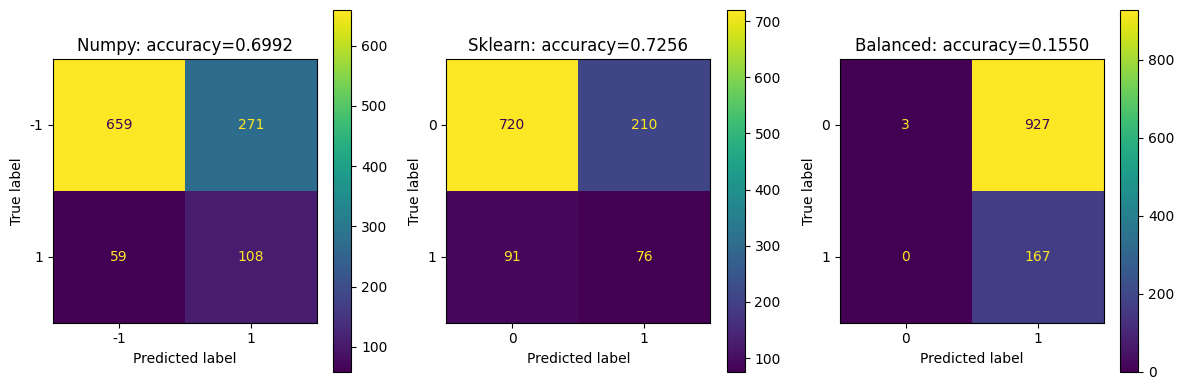

In [215]:
# predict
y_pred = h(w[-1], X_test_.T).squeeze()

fig, axes = plt.subplots(1,3, figsize=(12,4))

ConfusionMatrixDisplay.from_predictions(y_test_, y_pred, ax=axes[0])
axes[0].set_title(f'Numpy: accuracy={accuracy_score(y_test_, y_pred):.4f}')

ConfusionMatrixDisplay.from_predictions(y_test, sklearn_pred, ax=axes[1])
axes[1].set_title(f'Sklearn: accuracy={accuracy_score(y_test, sklearn_pred):.4f}')

ConfusionMatrixDisplay.from_predictions(y_test, sklearn_balanced_pred, ax=axes[2])
axes[2].set_title(f'Balanced: accuracy={accuracy_score(y_test, sklearn_balanced_pred):.4f}')

plt.tight_layout()
plt.show()

b.

Text(0.5, 1.0, 'Accuracy: 0.7010')

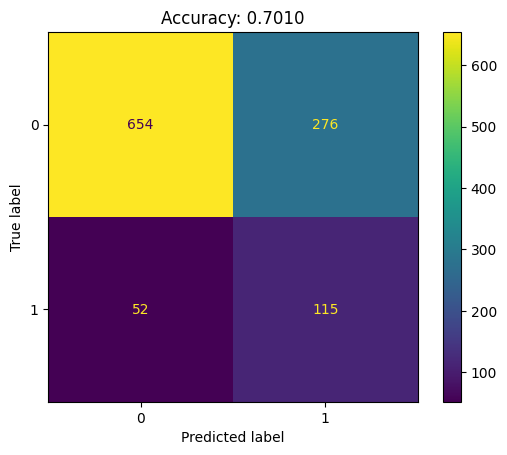

In [198]:
lr = LogisticRegression(max_iter=10000, penalty=None, class_weight='balanced', random_state=None)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

c.

Text(0.5, 1.0, 'Accuracy: 0.8377')

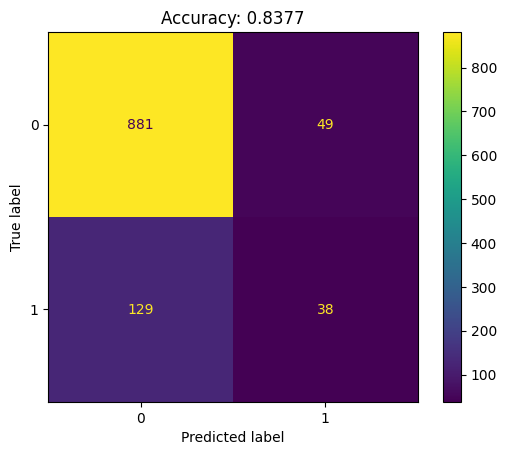

In [199]:
gnb = GaussianNB(priors=None)
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

- Độ chính xác sắp xếp theo thứ tự tăng dần: Perceptron < Logistic regression < Gaussian NB
- Tuy nhiên, dữ liệu của bài toán gặp hiện tượng mất cân bằng nhãn nghiêm trọng -> không nên dựa vào mỗi accuracy để đánh giá mô hình

#### 3.

In [12]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [13]:
X_train_ = np.concatenate((np.ones((pca_train.shape[0], 1)), pca_train), axis=1)
X_test_ = np.concatenate((np.ones((pca_test.shape[0], 1)), pca_test), axis=1)
y_train_ = np.array(list(map(lambda x: -1 if x == 0 else 1, y_train)))
y_test_ = np.array(list(map(lambda x: -1 if x == 0 else 1, y_test)))
w_init = np.zeros((pca_train.T.shape[0], 1))
w, m = perceptron(pca_train.T, np.expand_dims(y_train_, axis=0), w_init)
print(w[-1])

Failed to converge.
[[-58.99811374]
 [ -7.89065781]]


Text(0.5, 1.0, 'Accuracy: 0.4485')

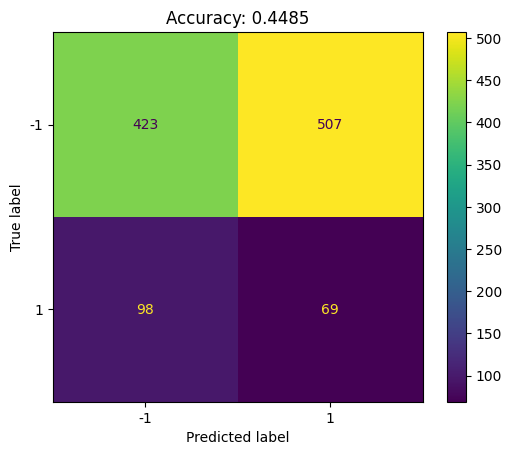

In [17]:
# predict
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

y_pred = h(w[-1], pca_test.T).squeeze()

ConfusionMatrixDisplay.from_predictions(y_test_, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test_, y_pred):.4f}')

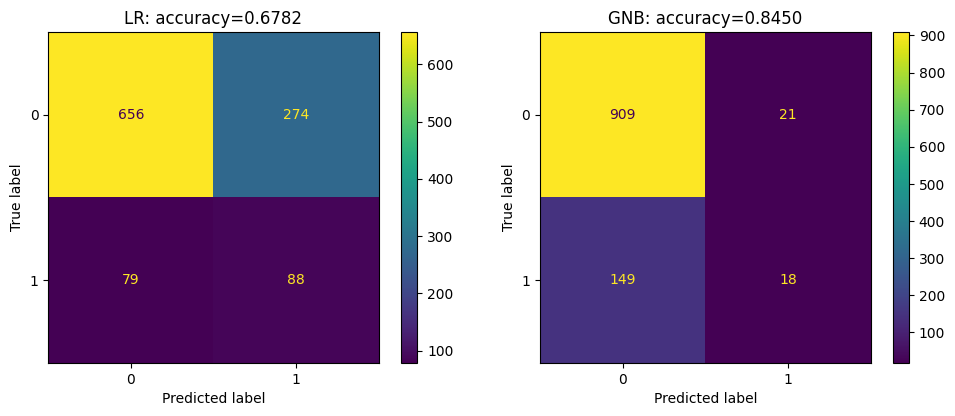

In [19]:
lr = LogisticRegression(fit_intercept=True,max_iter=10000, class_weight='balanced')
gnb = GaussianNB(priors=None)

lr.fit(pca_train, y_train)
lr_pred = lr.predict(pca_test)

gnb.fit(pca_train, y_train)
gnb_pred = gnb.predict(pca_test)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, ax=axes[0])
axes[0].set_title(f'LR: accuracy={accuracy_score(y_test, lr_pred):.4f}')

ConfusionMatrixDisplay.from_predictions(y_test, gnb_pred, ax=axes[1])
axes[1].set_title(f'GNB: accuracy={accuracy_score(y_test, gnb_pred):.4f}')

plt.tight_layout()
plt.show()

- Như đã thấy ở trên, dữ liệu thu được từ PCA gặp hiện tượng chồng lấn nên các phương pháp dựa trên khả năng tách được tuyến tính như Perceptron hay Logistic regression đều cho kết quả thấp.
- Đối với phương pháp Naive Bayes, do mô hình phụ thuộc nhiều vào phân phối của dữ liệu nên trong trường hợp dữ liệu mất cân bằng nhãn, mô hình cũng cho kết quả không tốt.
- Các mô hình thay đổi không nhiều so với trước và sau khi PCA.

## Ví dụ 5.

#### 1.

In [33]:
data = pd.read_csv('Analysis-Portfolio-Task-Data.csv').drop('CustomerID', axis=1)
data = pd.get_dummies(data, columns=['Store Type', 'Gender'])
data

,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products,Store Type_Convenient Stores,Store Type_Online,Store Type_Superstore,Gender_Female,Gender_Male
0,48.81,26,8,2,1,True,False,False,False,True
1,33.44,33,6,5,1,False,False,True,True,False
2,131.57,56,35,8,12,False,True,False,False,True
3,20.02,27,0,1,1,True,False,False,False,True
4,95.54,55,38,18,20,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
70,75.23,53,9,14,5,False,False,True,True,False
71,97.21,43,18,9,10,False,False,True,True,False
72,77.65,46,10,10,9,False,False,True,True,False
73,128.67,48,41,15,19,False,False,True,True,False


In [38]:
X, y = data.drop('Shopping Basket', axis=1), data['Shopping Basket']
X_train, X_test = data[:60], data[60:]
y_train, y_test = y[:60], y[60:]

In [42]:
data.corr()

,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products,Store Type_Convenient Stores,Store Type_Online,Store Type_Superstore,Gender_Female,Gender_Male
Shopping Basket,1.000000,0.658332,0.817181,0.781882,0.804173,-0.558329,0.637117,-0.078669,0.249754,-0.249754
Age,0.658332,1.000000,0.548782,0.646164,0.611908,-0.639258,0.464537,0.148878,0.219796,-0.219796
Value Products,0.817181,0.548782,1.000000,0.751488,0.719278,-0.452970,0.653330,-0.186883,0.153367,-0.153367
Brand Products,0.781882,0.646164,0.751488,1.000000,0.669976,-0.491189,0.587296,-0.093374,0.314775,-0.314775
Top Fresco Products,0.804173,0.611908,0.719278,0.669976,1.000000,-0.455175,0.523365,-0.067704,0.251422,-0.251422
Store Type_Convenient Stores,-0.558329,-0.639258,-0.452970,-0.491189,-0.455175,1.000000,-0.376051,-0.549138,-0.217262,0.217262
Store Type_Online,0.637117,0.464537,0.653330,0.587296,0.523365,-0.376051,1.000000,-0.567885,-0.064194,0.064194
Store Type_Superstore,-0.078669,0.148878,-0.186883,-0.093374,-0.067704,-0.549138,-0.567885,1.000000,0.250895,-0.250895
Gender_Female,0.249754,0.219796,0.153367,0.314775,0.251422,-0.217262,-0.064194,0.250895,1.000000,-1.000000
Gender_Male,-0.249754,-0.219796,-0.153367,-0.314775,-0.251422,0.217262,0.064194,-0.250895,-1.000000,1.000000


In [41]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 1.054825359416276e-27
MAE: 2.8451315377727343e-14
R2: 1.0


#### 2.

In [44]:
y_train = y_train.apply(lambda x: 1 if x > 50.0 else -1)
y_test = y_test.apply(lambda x: 1 if x > 50.0 else -1)

Text(0.5, 1.0, 'Accuracy: 0.8667')

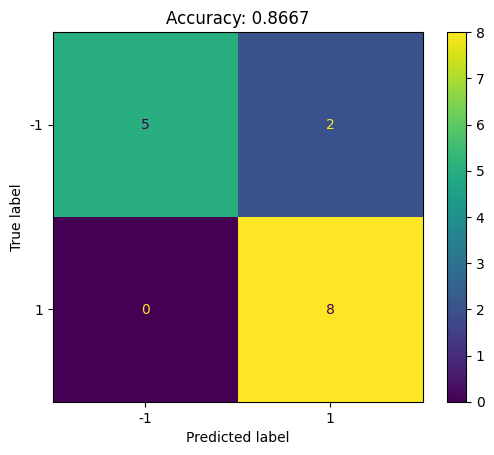

In [85]:
pct = Perceptron(random_state=None)
pct.fit(X_train, y_train)

y_pred = pct.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Text(0.5, 1.0, 'Accuracy: 1.0000')

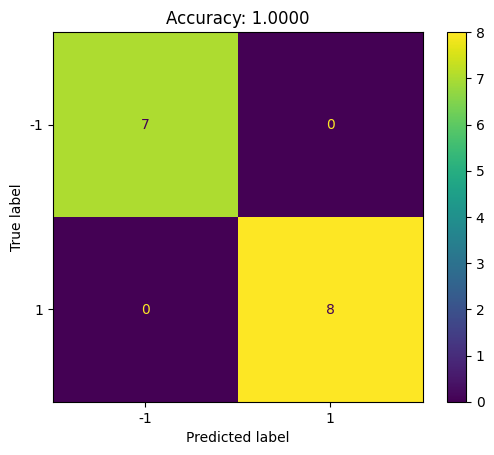

In [47]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Text(0.5, 1.0, 'Accuracy: 1.0000')

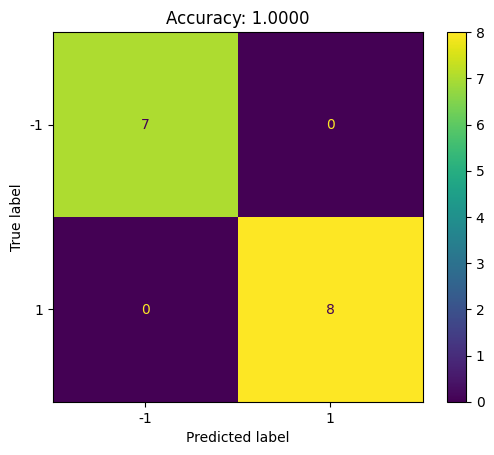

In [49]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Text(0.5, 1.0, 'Test set')

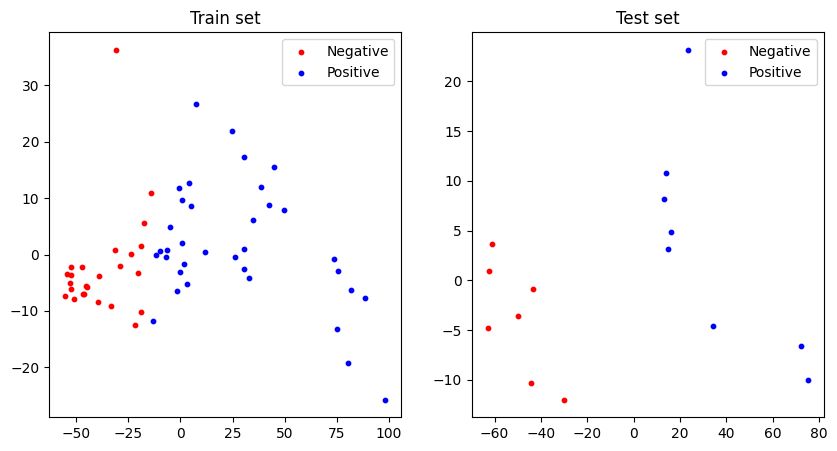

In [ ]:
# visualize
pca = PCA(n_components=2)
train_transformed = pca.fit_transform(X_train)
test_transformed = pca.transform(X_test)

fig, axes = plt.subplots(1,2,figsize=(10,5))
train_transformed0 = train_transformed[y_train == -1]
train_transformed1 = train_transformed[y_train == 1]
test_transformed0 = test_transformed[y_test == -1]
test_transformed1 = test_transformed[y_test == 1]

axes[0].scatter(train_transformed0[:, 0], train_transformed0[:, 1], c='r', s=10, label='Negative')
axes[0].scatter(train_transformed1[:, 0], train_transformed1[:, 1], c='b', s=10, label='Positive')
axes[0].legend()
axes[0].set_title('Train set')

axes[1].scatter(test_transformed0[:, 0], test_transformed0[:, 1], c='r', s=10, label='Negative')
axes[1].scatter(test_transformed1[:, 0], test_transformed1[:, 1], c='b', s=10, label='Positive')
axes[1].legend()
axes[1].set_title('Test set')

- Nhìn chung, dữ liệu đầu vào có thể tách được tuyến tính hoặc gần tách được tuyến tính, do đó, các mô hình đều cho kết quả tốt.